Assignment 01 - Programming Task
A* Search — Class based Implementation & Heuristic Experiments

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def astar(maze, start, goal, heuristic):
    """
    A* Search Algorithm.
    
    Parameters:
        maze: 2D list, 0 = free cell, 1 = wall
        start: (row, col)
        goal: (row, col)
        heuristic: function to estimate cost from node to goal
    
    Returns:
        path: list of coordinates from start to goal
        cost: length of path (number of steps)
    """
    rows, cols = len(maze), len(maze[0])
    open_list = [(0 + heuristic(start, goal), 0, start, [])]  # (f, g, node, path)
    visited = set()

    while open_list:
        f, g, current, path = heapq.heappop(open_list)
        if current in visited:
            continue
        path = path + [current]

        # Goal check
        if current == goal:
            return path, g
        
        visited.add(current)
        r, c = current

        # Explore neighbors
        for dr, dc in [(1,0),(-1,0),(0,1),(0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                new_g = g + 1
                new_f = new_g + heuristic((nr, nc), goal)
                heapq.heappush(open_list, (new_f, new_g, (nr, nc), path))
    
    return None, float("inf")  # No path found


In [2]:
# Standard Manhattan distance (admissible + consistent)
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Scaled Manhattan distance (may break admissibility)
def scaled_manhattan(a, b):
    return 1.5 * manhattan(a, b)

# Example of heuristic violating consistency
def inconsistent_heuristic(a, b):
    # Admissible for most nodes, but purposely inconsistent for demonstration
    if a == (1,1):  
        return 10  # artificially high
    return manhattan(a, b)


In [3]:
maze = [
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
]

start, goal = (0, 0), (4, 4)


In [4]:
# Case 1: Manhattan distance
path1, cost1 = astar(maze, start, goal, manhattan)
print("Case 1 - Manhattan:")
print("Path:", path1)
print("Cost:", cost1)
print("Optimal? Yes (Manhattan is admissible)\n")

# Case 2: Scaled Manhattan
path2, cost2 = astar(maze, start, goal, scaled_manhattan)
print("Case 2 - Scaled Manhattan (1.5x):")
print("Path:", path2)
print("Cost:", cost2)
print("Optimal? Probably not (heuristic may overestimate)\n")

# Case 3: Inconsistent heuristic
path3, cost3 = astar(maze, start, goal, inconsistent_heuristic)
print("Case 3 - Inconsistent Heuristic:")
print("Path:", path3)
print("Cost:", cost3)
print("Optimal? Path may still be optimal, but expansion order is wrong\n")


Case 1 - Manhattan:
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Cost: 8
Optimal? Yes (Manhattan is admissible)

Case 2 - Scaled Manhattan (1.5x):
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Cost: 8
Optimal? Probably not (heuristic may overestimate)

Case 3 - Inconsistent Heuristic:
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Cost: 8
Optimal? Path may still be optimal, but expansion order is wrong



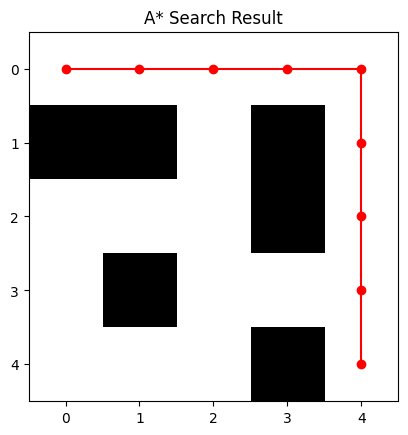

In [5]:
def plot_maze(maze, path):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap="gray_r")

    if path:
        px, py = zip(*path)
        plt.plot(py, px, marker="o", color="red")

    plt.title("A* Search Result")
    plt.show()

# Example visualization for Case 1
plot_maze(maze, path1)
